In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/online_shoppers_intention (1).csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Month'] = le.fit_transform(df['Month'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [5]:
X = df[['ProductRelated_Duration','Administrative_Duration','Informational_Duration','VisitorType','SpecialDay','PageValues','Region','Month']]
y = df['Revenue']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Model

In [7]:
class Plot():
    def __init__(self): 
        self.cmap = plt.get_cmap('viridis')

    def _transform(self, X, dim):
        covariance = calculate_covariance_matrix(X)
        eigenvalues, eigenvectors = np.linalg.eig(covariance)
        # Sort eigenvalues and eigenvector by largest eigenvalues
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:dim]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :dim]
        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed


    def plot_regression(self, lines, title, axis_labels=None, mse=None, scatter=None, legend={"type": "lines", "loc": "lower right"}):
        
        if scatter:
            scatter_plots = scatter_labels = []
            for s in scatter:
                scatter_plots += [plt.scatter(s["x"], s["y"], color=s["color"], s=s["size"])]
                scatter_labels += [s["label"]]
            scatter_plots = tuple(scatter_plots)
            scatter_labels = tuple(scatter_labels)

        for l in lines:
            li = plt.plot(l["x"], l["y"], color=s["color"], linewidth=l["width"], label=l["label"])

        if mse:
            plt.suptitle(title)
            plt.title("MSE: %.2f" % mse, fontsize=10)
        else:
            plt.title(title)

        if axis_labels:
            plt.xlabel(axis_labels["x"])
            plt.ylabel(axis_labels["y"])

        if legend["type"] == "lines":
            plt.legend(loc="lower_left")
        elif legend["type"] == "scatter" and scatter:
            plt.legend(scatter_plots, scatter_labels, loc=legend["loc"])

        plt.show()



    # Plot the dataset X and the corresponding labels y in 2D using PCA.
    def plot_in_2d(self, X, y=None, title=None, accuracy=None, legend_labels=None):
        X_transformed = self._transform(X, dim=2)
        x1 = X_transformed[:, 0]
        x2 = X_transformed[:, 1]
        class_distr = []

        y = np.array(y).astype(int)

        colors = [self.cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

        # Plot the different class distributions
        for i, l in enumerate(np.unique(y)):
            _x1 = x1[y == l]
            _x2 = x2[y == l]
            _y = y[y == l]
            class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

        # Plot legend
        if not legend_labels is None: 
            plt.legend(class_distr, legend_labels, loc=1)

        # Plot title
        if title:
            if accuracy:
                perc = 100 * accuracy
                plt.suptitle(title)
                plt.title("Accuracy: %.1f%%" % perc, fontsize=10)
            else:
                plt.title(title)

        # Axis labels
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

        plt.show()

    # Plot the dataset X and the corresponding labels y in 3D using PCA.
    def plot_in_3d(self, X, y=None):
        X_transformed = self._transform(X, dim=3)
        x1 = X_transformed[:, 0]
        x2 = X_transformed[:, 1]
        x3 = X_transformed[:, 2]
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x1, x2, x3, c=y)
        plt.show()


In [8]:
def to_categorical(x, n_col=None):
    """ One-hot encoding of nominal values """
    if not n_col:
        n_col = np.amax(x) + 1
    one_hot = np.zeros((x.shape[0], n_col))
    one_hot[np.arange(x.shape[0]), x] = 1
    return one_hot


def to_nominal(x):
    """ Conversion from one-hot encoding to nominal """
    return np.argmax(x, axis=1)


def make_diagonal(x):
    """ Converts a vector into an diagonal matrix """
    m = np.zeros((len(x), len(x)))
    for i in range(len(m[0])):
        m[i, i] = x[i]
    return m

In [9]:
from __future__ import division, print_function
import numpy as np
import progressbar
bar_widgets = [
    'Training: ', progressbar.Percentage(), ' ', progressbar.Bar(marker="-", left="[", right="]"),
    ' ', progressbar.ETA()
]

class Sigmoid():
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, x):
        return self.__call__(x) * (1 - self.__call__(x))

In [10]:
from __future__ import division
import numpy as np
import math
import sys


def calculate_entropy(y):
    """ Calculate the entropy of label array y """
    log2 = lambda x: math.log(x) / math.log(2)
    unique_labels = np.unique(y)
    entropy = 0
    for label in unique_labels:
        count = len(y[y == label])
        p = count / len(y)
        entropy += -p * log2(p)
    return entropy


def mean_squared_error(y_true, y_pred):
    """ Returns the mean squared error between y_true and y_pred """
    mse = np.mean(np.power(y_true - y_pred, 2))
    return mse


def calculate_variance(X):
    """ Return the variance of the features in dataset X """
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    
    return variance


def calculate_std_dev(X):
    """ Calculate the standard deviations of the features in dataset X """
    std_dev = np.sqrt(calculate_variance(X))
    return std_dev


def euclidean_distance(x1, x2):
    """ Calculates the l2 distance between two vectors """
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)


def accuracy_score(y_true, y_pred):
    """ Compare y_true to y_pred and return the accuracy """
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy


def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)
 

def calculate_correlation_matrix(X, Y=None):
    """ Calculate the correlation matrix for the dataset X """
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance = (1 / n_samples) * (X - X.mean(0)).T.dot(Y - Y.mean(0))
    std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
    std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
    correlation_matrix = np.divide(covariance, std_dev_X.dot(std_dev_y.T))

    return np.array(correlation_matrix, dtype=float)

In [11]:
class LogisticRegression():
    """ Logistic Regression classifier.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If
        false then we use batch optimization by least squares.
    """
    def __init__(self, learning_rate=.1, gradient_descent=True):
        self.param = None
        self.learning_rate = learning_rate
        self.gradient_descent = gradient_descent
        self.sigmoid = Sigmoid()

    def _initialize_parameters(self, X):
        n_features = np.shape(X)[1]
        # Initialize parameters between [-1/sqrt(N), 1/sqrt(N)]
        limit = 1 / math.sqrt(n_features)
        self.param = np.random.uniform(-limit, limit, (n_features,))

    def fit(self, X, y, n_iterations=4000):
        self._initialize_parameters(X)
        # Tune parameters for n iterations
        for i in range(n_iterations):
            # Make a new prediction
            y_pred = self.sigmoid(X.dot(self.param))
            if self.gradient_descent:
                # Move against the gradient of the loss function with
                # respect to the parameters to minimize the loss
                self.param -= self.learning_rate * -(y - y_pred).dot(X)
            else:
                # Make a diagonal matrix of the sigmoid gradient column vector
                diag_gradient = make_diagonal(self.sigmoid.gradient(X.dot(self.param)))
                # Batch opt:
                self.param = np.linalg.pinv(X.T.dot(diag_gradient).dot(X)).dot(X.T).dot(diag_gradient.dot(X).dot(self.param) + y - y_pred)

    def predict(self, X):
        y_pred = np.round(self.sigmoid(X.dot(self.param))).astype(int)
        return y_pred

In [12]:
def rbf_kernel(gamma, **kwargs):
    def f(x1, x2):
        distance = np.linalg.norm(x1 - x2) ** 2
        return np.exp(-gamma * distance)
    return

In [13]:
class SupportVectorMachine(object):
    """The Support Vector Machine classifier.
    Uses cvxopt to solve the quadratic optimization problem.
    Parameters:
    -----------
    C: float
        Penalty term.
    kernel: function
        Kernel function. Can be either polynomial, rbf or linear.
    power: int
        The degree of the polynomial kernel. Will be ignored by the other
        kernel functions.
    gamma: float
        Used in the rbf kernel function.
    coef: float
        Bias term used in the polynomial kernel function.
    """
    def __init__(self, C=1, kernel=rbf_kernel, power=4, gamma=None, coef=4):
        self.C = C
        self.kernel = kernel
        self.power = power
        self.gamma = gamma
        self.coef = coef
        self.lagr_multipliers = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.intercept = None

    def fit(self, X, y):

        n_samples, n_features = np.shape(X)

        # Set gamma to 1/n_features by default
        if not self.gamma:
            self.gamma = 1 / n_features

        # Initialize kernel method with parameters
        self.kernel = self.kernel(
            power=self.power,
            gamma=self.gamma,
            coef=self.coef)

        # Calculate kernel matrix
        kernel_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                kernel_matrix[i, j] = self.kernel(X[i], X[j])

        # Define the quadratic optimization problem
        P = cvxopt.matrix(np.outer(y, y) * kernel_matrix, tc='d')
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples), tc='d')
        b = cvxopt.matrix(0, tc='d')

        if not self.C:
            G = cvxopt.matrix(np.identity(n_samples) * -1)
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            G_max = np.identity(n_samples) * -1
            G_min = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((G_max, G_min)))
            h_max = cvxopt.matrix(np.zeros(n_samples))
            h_min = cvxopt.matrix(np.ones(n_samples) * self.C)
            h = cvxopt.matrix(np.vstack((h_max, h_min)))

        # Solve the quadratic optimization problem using cvxopt
        minimization = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        lagr_mult = np.ravel(minimization['x'])

        # Extract support vectors
        # Get indexes of non-zero lagr. multipiers
        idx = lagr_mult > 1e-7
        # Get the corresponding lagr. multipliers
        self.lagr_multipliers = lagr_mult[idx]
        # Get the samples that will act as support vectors
        self.support_vectors = X[idx]
        # Get the corresponding labels
        self.support_vector_labels = y[idx]

        # Calculate intercept with first support vector
        self.intercept = self.support_vector_labels[0]
        for i in range(len(self.lagr_multipliers)):
            self.intercept -= self.lagr_multipliers[i] * self.support_vector_labels[
                i] * self.kernel(self.support_vectors[i], self.support_vectors[0])

    def predict(self, X):
        y_pred = []
        # Iterate through list of samples and make predictions
        for sample in X:
            prediction = 0
            # Determine the label of the sample by the support vectors
            for i in range(len(self.lagr_multipliers)):
                prediction += self.lagr_multipliers[i] * self.support_vector_labels[
                    i] * self.kernel(self.support_vectors[i], sample)
            prediction += self.intercept
            y_pred.append(np.sign(prediction))
        return np.array(y_pred)

In [14]:
class RandomForest():
    """Random Forest classifier. Uses a collection of classification trees that
    trains on random subsets of the data using a random subsets of the features.
    Parameters:
    -----------
    n_estimators: int
        The number of classification trees that are used.
    max_features: int
        The maximum number of features that the classification trees are allowed to
        use.
    min_samples_split: int
        The minimum number of samples needed to make a split when building a tree.
    min_gain: float
        The minimum impurity required to split the tree further. 
    max_depth: int
        The maximum depth of a tree.
    """
    def __init__(self, n_estimators=100, max_features=None, min_samples_split=2,
                 min_gain=0, max_depth=float("inf")):
        self.n_estimators = n_estimators    # Number of trees
        self.max_features = max_features    # Maxmimum number of features per tree
        self.min_samples_split = min_samples_split
        self.min_gain = min_gain            # Minimum information gain req. to continue
        self.max_depth = max_depth          # Maximum depth for tree
        self.progressbar = progressbar.ProgressBar(widgets=bar_widgets)

        # Initialize decision trees
        self.trees = []
        for _ in range(n_estimators):
            self.trees.append(
                ClassificationTree(
                    min_samples_split=self.min_samples_split,
                    min_impurity=min_gain,
                    max_depth=self.max_depth))

    def fit(self, X, y):
        n_features = np.shape(X)[1]
        # If max_features have not been defined => select it as
        # sqrt(n_features)
        if not self.max_features:
            self.max_features = int(math.sqrt(n_features))

        # Choose one random subset of the data for each tree
        subsets = get_random_subsets(X, y, self.n_estimators)

        for i in self.progressbar(range(self.n_estimators)):
            X_subset, y_subset = subsets[i]
            # Feature bagging (select random subsets of the features)
            idx = np.random.choice(range(n_features), size=self.max_features, replace=True)
            # Save the indices of the features for prediction
            self.trees[i].feature_indices = idx
            # Choose the features corresponding to the indices
            X_subset = X_subset[:, idx]
            # Fit the tree to the data
            self.trees[i].fit(X_subset, y_subset)

    def predict(self, X):
        y_preds = np.empty((X.shape[0], len(self.trees)))
        # Let each tree make a prediction on the data
        for i, tree in enumerate(self.trees):
            # Indices of the features that the tree has trained on
            idx = tree.feature_indices
            # Make a prediction based on those features
            prediction = tree.predict(X[:, idx])
            y_preds[:, i] = prediction
            
        y_pred = []
        # For each sample
        for sample_predictions in y_preds:
            # Select the most common class prediction
            y_pred.append(np.bincount(sample_predictions.astype('int')).argmax())
        return y_pred

In [15]:
class DecisionNode():
    """Class that represents a decision node or leaf in the decision tree
    Parameters:
    -----------
    feature_i: int
        Feature index which we want to use as the threshold measure.
    threshold: float
        The value that we will compare feature values at feature_i against to
        determine the prediction.
    value: float
        The class prediction if classification tree, or float value if regression tree.
    true_branch: DecisionNode
        Next decision node for samples where features value met the threshold.
    false_branch: DecisionNode
        Next decision node for samples where features value did not meet the threshold.
    """
    def __init__(self, feature_i=None, threshold=None,
                 value=None, true_branch=None, false_branch=None):
        self.feature_i = feature_i          # Index for the feature that is tested
        self.threshold = threshold          # Threshold value for feature
        self.value = value                  # Value if the node is a leaf in the tree
        self.true_branch = true_branch      # 'Left' subtree
        self.false_branch = false_branch    # 'Right' subtree


# Super class of RegressionTree and ClassificationTree
class DecisionTree(object):
    """Super class of RegressionTree and ClassificationTree.
    Parameters:
    -----------
    min_samples_split: int
        The minimum number of samples needed to make a split when building a tree.
    min_impurity: float
        The minimum impurity required to split the tree further.
    max_depth: int
        The maximum depth of a tree.
    loss: function
        Loss function that is used for Gradient Boosting models to calculate impurity.
    """
    def __init__(self, min_samples_split=2, min_impurity=1e-7,
                 max_depth=float("inf"), loss=None):
        self.root = None  # Root node in dec. tree
        # Minimum n of samples to justify split
        self.min_samples_split = min_samples_split
        # The minimum impurity to justify split
        self.min_impurity = min_impurity
        # The maximum depth to grow the tree to
        self.max_depth = max_depth
        # Function to calculate impurity (classif.=>info gain, regr=>variance reduct.)
        self._impurity_calculation = None
        # Function to determine prediction of y at leaf
        self._leaf_value_calculation = None
        # If y is one-hot encoded (multi-dim) or not (one-dim)
        self.one_dim = None
        # If Gradient Boost
        self.loss = loss

    def fit(self, X, y, loss=None):
        """ Build decision tree """
        self.one_dim = len(np.shape(y)) == 1
        self.root = self._build_tree(X, y)
        self.loss=None

    def _build_tree(self, X, y, current_depth=0):
        """ Recursive method which builds out the decision tree and splits X and respective y
        on the feature of X which (based on impurity) best separates the data"""

        largest_impurity = 0
        best_criteria = None    # Feature index and threshold
        best_sets = None        # Subsets of the data

        # Check if expansion of y is needed
        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        # Add y as last column of X
        Xy = np.concatenate((X, y), axis=1)

        n_samples, n_features = np.shape(X)

        if n_samples >= self.min_samples_split and current_depth <= self.max_depth:
            # Calculate the impurity for each feature
            for feature_i in range(n_features):
                # All values of feature_i
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)

                # Iterate through all unique values of feature column i and
                # calculate the impurity
                for threshold in unique_values:
                    # Divide X and y depending on if the feature value of X at index feature_i
                    # meets the threshold
                    Xy1, Xy2 = divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        # Select the y-values of the two sets
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        # Calculate impurity
                        impurity = self._impurity_calculation(y, y1, y2)

                        # If this threshold resulted in a higher information gain than previously
                        # recorded save the threshold value and the feature
                        # index
                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],   # X of left subtree
                                "lefty": Xy1[:, n_features:],   # y of left subtree
                                "rightX": Xy2[:, :n_features],  # X of right subtree
                                "righty": Xy2[:, n_features:]   # y of right subtree
                                }

        if largest_impurity > self.min_impurity:
            # Build subtrees for the right and left branches
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(feature_i=best_criteria["feature_i"], threshold=best_criteria[
                                "threshold"], true_branch=true_branch, false_branch=false_branch)

        # We're at leaf => determine value
        leaf_value = self._leaf_value_calculation(y)

        return DecisionNode(value=leaf_value)


    def predict_value(self, x, tree=None):
        """ Do a recursive search down the tree and make a prediction of the data sample by the
            value of the leaf that we end up at """

        if tree is None:
            tree = self.root

        # If we have a value (i.e we're at a leaf) => return value as the prediction
        if tree.value is not None:
            return tree.value

        # Choose the feature that we will test
        feature_value = x[tree.feature_i]

        # Determine if we will follow left or right branch
        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        # Test subtree
        return self.predict_value(x, branch)

    def predict(self, X):
        """ Classify samples one by one and return the set of labels """
        y_pred = [self.predict_value(sample) for sample in X]
        return y_pred

    def print_tree(self, tree=None, indent=" "):
        """ Recursively print the decision tree """
        if not tree:
            tree = self.root

        # If we're at leaf => print the label
        if tree.value is not None:
            print (tree.value)
        # Go deeper down the tree
        else:
            # Print test
            print ("%s:%s? " % (tree.feature_i, tree.threshold))
            # Print the true scenario
            print ("%sT->" % (indent), end="")
            self.print_tree(tree.true_branch, indent + indent)
            # Print the false scenario
            print ("%sF->" % (indent), end="")
            self.print_tree(tree.false_branch, indent + indent)



class XGBoostRegressionTree(DecisionTree):
    """
    Regression tree for XGBoost
    - Reference -
    http://xgboost.readthedocs.io/en/latest/model.html
    """

    def _split(self, y):
        """ y contains y_true in left half of the middle column and
        y_pred in the right half. Split and return the two matrices """
        col = int(np.shape(y)[1]/2)
        y, y_pred = y[:, :col], y[:, col:]
        return y, y_pred

    def _gain(self, y, y_pred):
        nominator = np.power((y * self.loss.gradient(y, y_pred)).sum(), 2)
        denominator = self.loss.hess(y, y_pred).sum()
        return 0.5 * (nominator / denominator)

    def _gain_by_taylor(self, y, y1, y2):
        # Split
        y, y_pred = self._split(y)
        y1, y1_pred = self._split(y1)
        y2, y2_pred = self._split(y2)

        true_gain = self._gain(y1, y1_pred)
        false_gain = self._gain(y2, y2_pred)
        gain = self._gain(y, y_pred)
        return true_gain + false_gain - gain

    def _approximate_update(self, y):
        # y split into y, y_pred
        y, y_pred = self._split(y)
        # Newton's Method
        gradient = np.sum(y * self.loss.gradient(y, y_pred), axis=0)
        hessian = np.sum(self.loss.hess(y, y_pred), axis=0)
        update_approximation =  gradient / hessian

        return update_approximation

    def fit(self, X, y):
        self._impurity_calculation = self._gain_by_taylor
        self._leaf_value_calculation = self._approximate_update
        super(XGBoostRegressionTree, self).fit(X, y)


class RegressionTree(DecisionTree):
    def _calculate_variance_reduction(self, y, y1, y2):
        var_tot = calculate_variance(y)
        var_1 = calculate_variance(y1)
        var_2 = calculate_variance(y2)
        frac_1 = len(y1) / len(y)
        frac_2 = len(y2) / len(y)

        # Calculate the variance reduction
        variance_reduction = var_tot - (frac_1 * var_1 + frac_2 * var_2)

        return sum(variance_reduction)

    def _mean_of_y(self, y):
        value = np.mean(y, axis=0)
        return value if len(value) > 1 else value[0]

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_variance_reduction
        self._leaf_value_calculation = self._mean_of_y
        super(RegressionTree, self).fit(X, y)

class ClassificationTree(DecisionTree):
    def _calculate_information_gain(self, y, y1, y2):
        # Calculate information gain
        p = len(y1) / len(y)
        entropy = calculate_entropy(y)
        info_gain = entropy - p * \
            calculate_entropy(y1) - (1 - p) * \
            calculate_entropy(y2)

        return info_gain

    def _majority_vote(self, y):
        most_common = None
        max_count = 0
        for label in np.unique(y):
            # Count number of occurences of samples with label
            count = len(y[y == label])
            if count > max_count:
                most_common = label
                max_count = count
        return most_common

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_information_gain
        self._leaf_value_calculation = self._majority_vote
        super(ClassificationTree, self).fit(X, y)

In [16]:
from __future__ import division
from itertools import combinations_with_replacement
import numpy as np
import math
import sys


def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]


def batch_iterator(X, y=None, batch_size=64):
    """ Simple batch generator """
    n_samples = X.shape[0]
    for i in np.arange(0, n_samples, batch_size):
        begin, end = i, min(i+batch_size, n_samples)
        if y is not None:
            yield X[begin:end], y[begin:end]
        else:
            yield X[begin:end]


def divide_on_feature(X, feature_i, threshold):
    """ Divide dataset based on if sample value on feature index is larger than
        the given threshold """
    split_func = None
    if isinstance(threshold, int) or isinstance(threshold, float):
        split_func = lambda sample: sample[feature_i] >= threshold
    else:
        split_func = lambda sample: sample[feature_i] == threshold

    X_1 = np.array([sample for sample in X if split_func(sample)])
    X_2 = np.array([sample for sample in X if not split_func(sample)])

    return np.array([X_1, X_2])


def polynomial_features(X, degree):
    n_samples, n_features = np.shape(X)

    def index_combinations():
        combs = [combinations_with_replacement(range(n_features), i) for i in range(0, degree + 1)]
        flat_combs = [item for sublist in combs for item in sublist]
        return flat_combs
    
    combinations = index_combinations()
    n_output_features = len(combinations)
    X_new = np.empty((n_samples, n_output_features))
    
    for i, index_combs in enumerate(combinations):  
        X_new[:, i] = np.prod(X[:, index_combs], axis=1)

    return X_new


def get_random_subsets(X, y, n_subsets, replacements=True):
    """ Return random subsets (with replacements) of the data """
    n_samples = np.shape(X)[0]
    # Concatenate x and y and do a random shuffle
    X_y = np.concatenate((X, y.reshape((1, len(y))).T), axis=1)
    np.random.shuffle(X_y)
    subsets = []

    # Uses 50% of training samples without replacements
    subsample_size = int(n_samples // 2)
    if replacements:
        subsample_size = n_samples      # 100% with replacements

    for _ in range(n_subsets):
        idx = np.random.choice(
            range(n_samples),
            size=np.shape(range(subsample_size)),
            replace=replacements)
        X = X_y[idx][:, :-1]
        y = X_y[idx][:, -1]
        subsets.append([X, y])
    return subsets


def normalize(X, axis=-1, order=2):
    """ Normalize the dataset X """
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


def standardize(X):
    """ Standardize the dataset X """
    X_std = X
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    for col in range(np.shape(X)[1]):
        if std[col]:
            X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]
    # X_std = (X - X.mean(axis=0)) / X.std(axis=0)
    return X_std

In [17]:
class LogisticLoss():
    def __init__(self):
        sigmoid = Sigmoid()
        self.log_func = sigmoid
        self.log_grad = sigmoid.gradient

    def loss(self, y, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        p = self.log_func(y_pred)
        return y * np.log(p) + (1 - y) * np.log(1 - p)

    # gradient w.r.t y_pred
    def gradient(self, y, y_pred):
        p = self.log_func(y_pred)
        return -(y - p)

    # w.r.t y_pred
    def hess(self, y, y_pred):
        p = self.log_func(y_pred)
        return p * (1 - p)


class XGBoost(object):
    """The XGBoost classifier.
    Reference: http://xgboost.readthedocs.io/en/latest/model.html
    Parameters:
    -----------
    n_estimators: int
        The number of classification trees that are used.
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    min_samples_split: int
        The minimum number of samples needed to make a split when building a tree.
    min_impurity: float
        The minimum impurity required to split the tree further. 
    max_depth: int
        The maximum depth of a tree.
    """
    def __init__(self, n_estimators=200, learning_rate=0.001, min_samples_split=2,
                 min_impurity=1e-7, max_depth=2):
        self.n_estimators = n_estimators            # Number of trees
        self.learning_rate = learning_rate          # Step size for weight update
        self.min_samples_split = min_samples_split  # The minimum n of sampels to justify split
        self.min_impurity = min_impurity              # Minimum variance reduction to continue
        self.max_depth = max_depth                  # Maximum depth for tree

        self.bar = progressbar.ProgressBar(widgets=bar_widgets)
        
        # Log loss for classification
        self.loss = LogisticLoss()

        # Initialize regression trees
        self.trees = []
        for _ in range(n_estimators):
            tree = XGBoostRegressionTree(
                    min_samples_split=self.min_samples_split,
                    min_impurity=min_impurity,
                    max_depth=self.max_depth,
                    loss=self.loss)

            self.trees.append(tree)

    def fit(self, X, y):
        y = to_categorical(y)

        y_pred = np.zeros(np.shape(y))
        for i in self.bar(range(self.n_estimators)):
            tree = self.trees[i]
            y_and_pred = np.concatenate((y, y_pred), axis=1)
            tree.fit(X, y_and_pred)
            update_pred = tree.predict(X)

            y_pred -= np.multiply(self.learning_rate, update_pred)

    def predict(self, X):
        y_pred = None
        # Make predictions
        for tree in self.trees:
            # Estimate gradient and update prediction
            update_pred = tree.predict(X)
            if y_pred is None:
                y_pred = np.zeros_like(update_pred)
            y_pred -= np.multiply(self.learning_rate, update_pred)

        # Turn into probability distribution (Softmax)
        y_pred = np.exp(y_pred) / np.sum(np.exp(y_pred), axis=1, keepdims=True)
        # Set label to the value that maximizes probability
        y_pred = np.argmax(y_pred, axis=1)
        return 

## *Result*-logisticRegression

In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test,predictions)

from sklearn.metrics import accuracy_score
accuracy_score_result = accuracy_score(y_test,predictions)

In [71]:
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score_result

[[2038   42]
 [ 239  147]]


0.8860502838605029

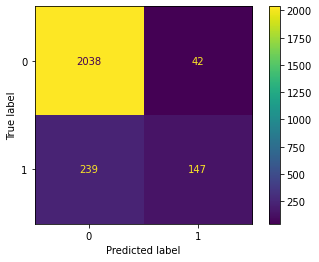

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logmodel, X_test, y_test)

In [19]:
def mse(true, pred):
    return sum((true-pred)**2) / len(true)

In [20]:
# MSE Logistic regression
mse(y_test, predictions)

0.11354420113544202

## Random Forest

In [65]:
classifier = RandomForest()
classifier.fit(X_train, y_train)

predictions_random_forest = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

accuracy_random_forest = confusion_matrix(y_test,predictions_random_forest)

from sklearn.metrics import accuracy_score

accuracy_random_forest = accuracy_score(y_test,predictions_random_forest)

In [66]:
cm = confusion_matrix(y_test, predictions_random_forest)
print(cm)
accuracy_random_forest

[[1995   85]
 [ 178  208]]


0.8933495539334956

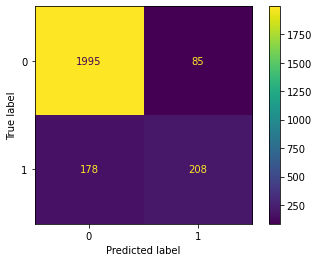

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

In [25]:
# MSE Logistic regression
mse(y_test, predictions_random_forest)

0.10624493106244931

## xgboost

In [58]:
XGBClassifier = XGBoost()
XGBClassifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = XGBClassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1983   97]
 [ 157  229]]


0.8969991889699919

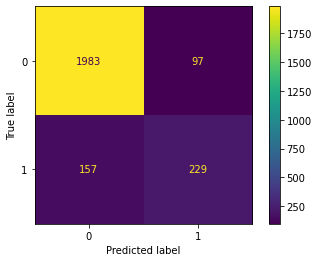

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(XGBClassifier, X_test, y_test)

In [47]:
# MSE XGBoost
mse(y_test, y_pred)

0.1030008110300081

## SupportVectorMachine

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifiersvc = SupportVectorMachine()
classifiersvc.fit(X_train, y_train)
y_pred_svc = classifiersvc.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_svm = accuracy_score(y_test,y_pred_svc)

In [19]:
accuracy_svm

0.897404703974047

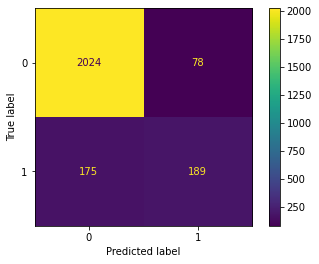

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifiersvc, X_test, y_test)

In [50]:
# MSE svc
mse(y_test, y_pred_svc)

0.11354420113544202

## Precision-Recall Curves


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

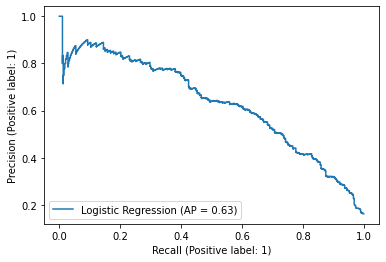

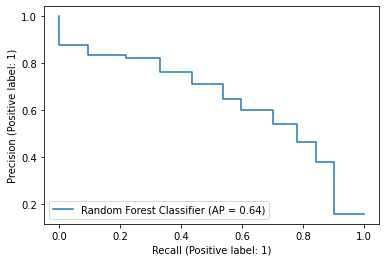

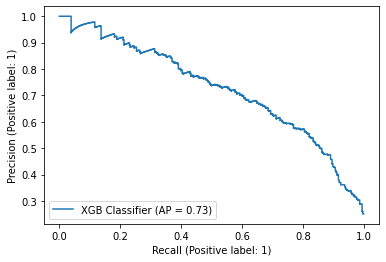

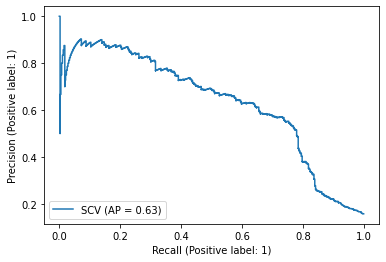

In [73]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(logmodel, X_test, y_test, name = 'Logistic Regression')
plot_precision_recall_curve(classifier, X_test, y_test, name = 'Random Forest Classifier')
plot_precision_recall_curve(XGBClassifier, X_test, y_test, name = 'XGB Classifier')
plot_precision_recall_curve(classifiersvc, X_test, y_test, name = 'SCV')